In [9]:
import pandas as pd

In [17]:
df = pd.read_csv("./data/curData.csv")

In [ ]:
df['is_post_crisis'] = (df['issue_d'].dt.year > 2010).astype(int)
feature_cols.append("is_post_crisis")

In [18]:
df = df.drop(columns=["issue_d"], axis=1)

In [23]:
df['issue_month'] = pd.to_datetime(df['issue_month'])
df["issue_month"] = df["issue_month"].dt.month

In [25]:
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [26]:
df["purpose"] = df["purpose"].astype("category")
df["home_ownership"] = df["home_ownership"].astype("category")

In [ ]:
feature_cols = ['loan_amnt', 'term', 'int_rate',
       'installment', 'purpose', 'emp_length', 'home_ownership', 'annual_inc',
       'dti', 'inq_last_6mths', 'delinq_2yrs', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'issue_month'
       'installment_to_income', 'fico_score', 'credit_age',
       'fed_funds_rate', 'unemployment_rate', 'cpi', 'real_gdp',
       'debt_service_ratio']

target = "loan_risk"

In [44]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from lightgbm.callback import early_stopping, log_evaluation

X = df[feature_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [45]:
model = lgb.LGBMClassifier(objective="binary", boosting_type="gbdt", n_estimators=1000,
    learning_rate=0.03, num_leaves=41, random_state=42)

In [46]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric="auc",
    callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=50)])

[LightGBM] [Info] Number of positive: 232662, number of negative: 1575872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3519
[LightGBM] [Info] Number of data points in the train set: 1808534, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128647 -> initscore=-1.912977
[LightGBM] [Info] Start training from score -1.912977
Training until validation scores don't improve for 50 rounds
[50]	valid_0's auc: 0.747273	valid_0's binary_logloss: 0.342282
[100]	valid_0's auc: 0.751459	valid_0's binary_logloss: 0.336947
[150]	valid_0's auc: 0.754032	valid_0's binary_logloss: 0.335334
[200]	valid_0's auc: 0.755534	valid_0's binary_logloss: 0.334577
[250]	valid_0's auc: 0.756366	valid_0's binary_logloss: 0.334179
[300]	valid_0's auc: 0.756756	valid_0's binary_loglo

,boosting_type,'gbdt'
,num_leaves,41
,max_depth,-1
,learning_rate,0.03
,n_estimators,1000
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [53]:
y_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print(f"Test ROC AUC: {auc:.4f}")

Test ROC AUC: 0.7586


In [37]:
import joblib

joblib.dump(model, 'model1.pkl')


['model1.pkl']

In [4]:
import joblib
import pandas
import lightgbm as lgb

In [ ]:
model = joblib.load("model.pkl")

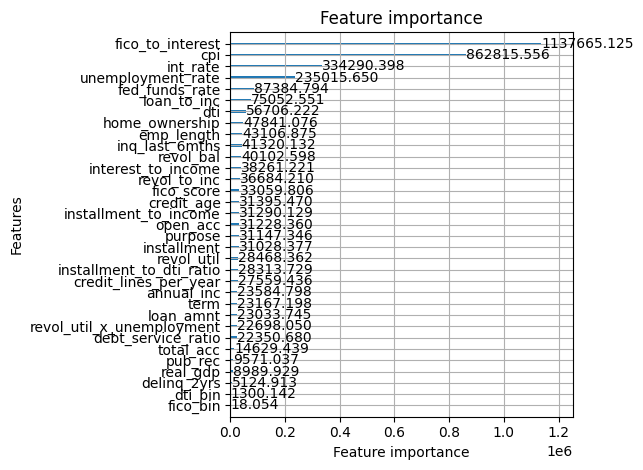

In [38]:
import matplotlib.pyplot as plt
lgb.plot_importance(model, importance_type="gain")
plt.tight_layout()
plt.show()

In [40]:
# Drop: "fico_bin", "dti_bin", "delinq_2yrs", "real_gdp", "pub_rec", "total_acc", "debt_service_ratio", "revol_util_x_unemployment", "loan_amnt", "term", "installment_to_dti_ratio"
dropList = ["fico_bin", "dti_bin", "delinq_2yrs", "real_gdp", "pub_rec", "total_acc", "debt_service_ratio", "revol_util_x_unemployment", "loan_amnt", "term", "installment_to_dti_ratio"]
df = df.drop(columns=dropList)

In [43]:
for col in dropList:
    feature_cols.remove(col)

In [41]:
df.columns

Index(['int_rate', 'installment', 'purpose', 'emp_length', 'home_ownership',
       'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'loan_risk', 'installment_to_income', 'fico_score',
       'credit_age', 'issue_month', 'fed_funds_rate', 'unemployment_rate',
       'cpi', 'interest_to_income', 'fico_to_interest', 'revol_to_inc',
       'loan_to_inc', 'credit_lines_per_year'],
      dtype='object')

In [16]:
from sklearn.model_selection import cross_val_score

cv_auc = cross_val_score(
    model, X, y, cv=5, scoring='roc_auc'
)
print("Mean CV AUC:", cv_auc.mean())


[LightGBM] [Info] Number of positive: 232662, number of negative: 1575872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2739
[LightGBM] [Info] Number of data points in the train set: 1808534, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128647 -> initscore=-1.912977
[LightGBM] [Info] Start training from score -1.912977
[LightGBM] [Info] Number of positive: 232661, number of negative: 1575873
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2735
[LightGBM] [Info] Number of data points in the train set: 1808534, number of used features: 24
[LightGB

In [30]:
df["interest_to_income"] = df["int_rate"] / (df["annual_inc"] + 1e-3)
feature_cols.append("interest_to_income")
df["installment_to_dti_ratio"] = df["installment_to_income"] / (df["dti"] + 1e-3)
feature_cols.append("installment_to_dti_ratio")
df["revol_util_x_unemployment"] = df["revol_util"] * df["unemployment_rate"]
feature_cols.append("revol_util_x_unemployment")
df["fico_to_interest"] = df["fico_score"] / (df["int_rate"] + 1e-3)
feature_cols.append("fico_to_interest")

df["revol_to_inc"] = df["revol_bal"] / (df["annual_inc"] + 1e-3)
feature_cols.append("revol_to_inc")
df["loan_to_inc"] = df["loan_amnt"] / (df["annual_inc"] + 1e-3)
feature_cols.append("loan_to_inc")
df["credit_lines_per_year"] = df["total_acc"] / (df["credit_age"] + 0.1)
feature_cols.append("credit_lines_per_year")

In [32]:
df['fico_bin'] = pd.qcut(df['fico_score'], q=4, labels=False)
feature_cols.append("fico_bin")
df['dti_bin'] = pd.cut(df['dti'], bins=[-1, 10, 20, 30, 100], labels=False)
feature_cols.append("dti_bin")

In [47]:
# Find best params
param_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.01, 0.03, 0.05],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
}

from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

model = LGBMClassifier(objective="binary", n_estimators=1000, random_state=42)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
    scoring="roc_auc", cv=3, n_iter=30, verbose=2, random_state=42, n_jobs=1
)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 155108, number of negative: 1050581
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.055692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3522
[LightGBM] [Info] Number of data points in the train set: 1205689, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.128647 -> initscore=-1.912977
[LightGBM] [Info] Start training from score -1.912977
[CV] END colsample_bytree=0.9, learning_rate=0.03, min_child_samples=50, num_leaves=127, reg_alpha=0.1, reg_lambda=0, subsample=0.8; total time=  34.7s
[LightGBM] [Info] Number of positive: 155108, number of negative: 1050581
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3521
[LightGBM] [Info] 

,estimator,LGBMClassifie...ndom_state=42)
,param_distributions,"{'colsample_bytree': [0.7, 0.8, ...], 'learning_rate': [0.01, 0.03, ...], 'min_child_samples': [20, 50, ...], 'num_leaves': [31, 63, ...], ...}"
,n_iter,30
,scoring,'roc_auc'
,n_jobs,1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [48]:
best_model = random_search.best_estimator_

from sklearn.metrics import roc_auc_score
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc_score)

AUC:  0.7585490715066698


In [ ]:
import pandas as pd

df = pd.read_csv("./data/curData.csv")
df = df.drop(columns=["issue_d"], axis=1)
df['issue_month'] = pd.to_datetime(df['issue_month'])
df["issue_month"] = df["issue_month"].dt.month
df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], axis=1)
df["purpose"] = df["purpose"].astype("category")
df["home_ownership"] = df["home_ownership"].astype("category")
feature_cols = ['loan_amnt', 'term', 'int_rate',
       'installment', 'purpose', 'emp_length', 'home_ownership', 'annual_inc',
       'dti', 'inq_last_6mths', 'delinq_2yrs', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'issue_month'
       'installment_to_income', 'fico_score', 'credit_age',
       'fed_funds_rate', 'unemployment_rate', 'cpi', 'real_gdp',
       'debt_service_ratio']

target = "loan_risk"

from sklearn.model_selection import train_test_split

X = df[feature_cols]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

import cudf
X_train, X_test, y_train, y_test = cudf.from_pandas(X_train), cudf.from_pandas(X_test), cudf.from_pandas(y_train), cudf.from_pandas(y_test)


In [ ]:
# Random Forest Classifier with SMOTE using GPU

import numpy as np
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from cuml.ensemble import RandomForestClassifier as cuRF

# Separate feature groups
categorical = ['purpose', 'home_ownership']
numeric = [col for col in df.columns if col not in categorical + ['loan_risk']]


RuntimeError: Scikit-learn array API support was enabled but scipy's own support is not enabled. Please set the SCIPY_ARRAY_API=1 environment variable before importing sklearn or scipy. More details at: https://docs.scipy.org/doc/scipy/dev/api-dev/array_api.html

In [ ]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical),
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy='mean')),
        ('scale', StandardScaler())
    ]), numeric)
])

pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', cuRF(random_state=42))
])


In [ ]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, 30],
    'classifier__max_features': [0.5, 0.7, 1.0],
    'classifier__min_samples_leaf': [1, 5, 10],
    'classifier__bootstrap': [True]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)